### 1. Se pide:

A partir del archivo "USA_Housing.csv", realizar la regresión no lineal entre cada columna numérica con la columna 'price' utilizando:

- Regresión polinómica no lineal con grados del 2 al 10. ¿El score se estanca a partir de cierto grado?

In [29]:
import pandas as pd

df = pd.read_csv("USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\r\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\r\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\r\nJoshualand, VA ..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\r\nFPO AE 73316


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

In [7]:
def get_PolyScore(df, start, stop, random_state=42):
    # Min and max degree of polynomials features to consider
    degree_min = start
    degree_max = stop

    cols = df.loc[:, :'Area Population'].columns
    y = np.array(df['Price'])
    data = {'Column':[], 'Degree':[], 'Score':[]}
    # Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
    for c in cols:
        X = np.array(df[c]).reshape(-1, 1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

        for degree in range(degree_min,degree_max+1):
            polinominal_model = PolynomialFeatures(degree) 
            X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1),y_train)

            lin_reg_model = LinearRegression()
            lin_reg_model.fit(X_poly, y_train)
            y_pred = lin_reg_model.predict(X_poly)
            score = r2_score(y_train, y_pred)

            data['Column'].append(c)
            data['Degree'].append(degree)
            data['Score'].append(score)

    return pd.DataFrame(data, index=range(len(data['Column'])))

In [30]:
scores = get_PolyScore(df, 2, 10)

In [31]:
scores

,Column,Degree,Score
0,Avg. Area Income,2,0.412722
1,Avg. Area Income,3,0.412722
2,Avg. Area Income,4,0.412715
3,Avg. Area Income,5,0.412634
4,Avg. Area Income,6,0.412342
5,Avg. Area Income,7,0.411598
6,Avg. Area Income,8,0.410089
7,Avg. Area Income,9,0.407489
8,Avg. Area Income,10,0.403527
9,Avg. Area House Age,2,0.201757


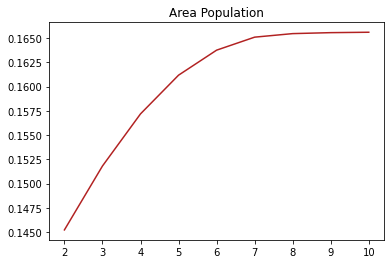

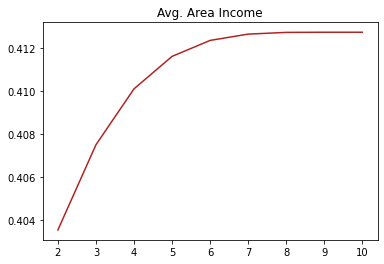

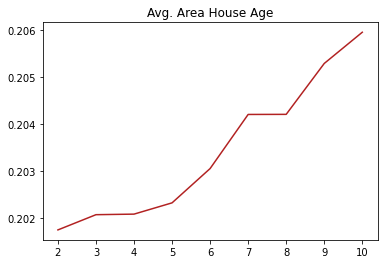

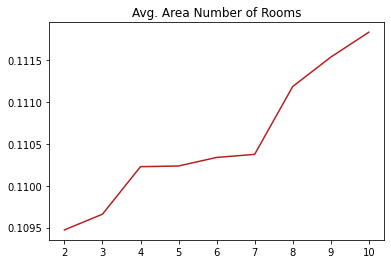

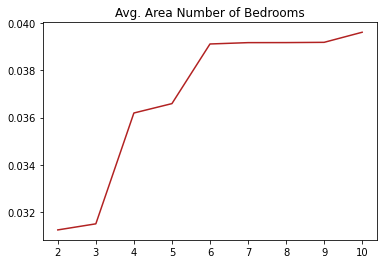

In [35]:
for col in list(set(scores.Column)):
    df2 = scores[scores.Column == col]
    plt.plot(df2['Degree'], df2['Score'].sort_values(), color='firebrick')
    plt.title(col)
    plt.show()

In [ ]:
# En general los scores se estancan a partir del grado 7.